In [3]:
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
np.random.seed(0)

In [8]:
X=np.linspace(0,2*np.pi,100)
y=np.sin(X)+np.random.normal(0,0.1,X.shape)


In [9]:
X=X.reshape(-1,1)

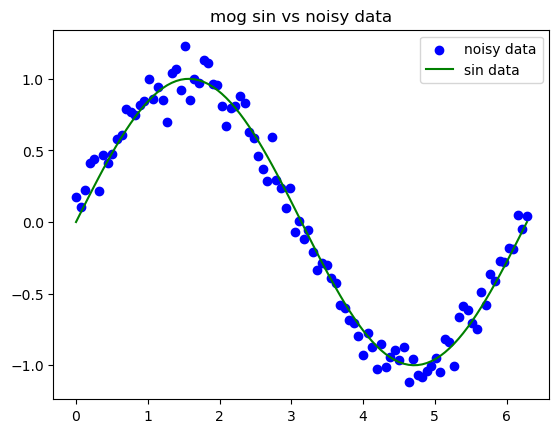

In [10]:
plt.scatter(X,y,color="blue",label="noisy data")
plt.plot(X,np.sin(X),color="green",label="sin data")
plt.legend()
plt.title("mog sin vs noisy data")
plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly=PolynomialFeatures(degree=10)
X_poly=poly.fit_transform(X)

In [13]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
ridge=Ridge(alpha=0.1)
lasso=Lasso(alpha=0.01,max_iter=10000)
elastic=ElasticNet(alpha=0.001,l1_ratio=0.5,max_iter=10000)

ridge.fit(X_poly,y)
lasso.fit(X_poly,y)
elastic.fit(X_poly,y)

y_ridge=ridge.predict(X_poly)
y_lasso=lasso.predict(X_poly)
y_elastic=elastic.predict(X_poly)


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.09934e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+00, tolerance: 5.170e-03
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.054e-01, tolerance: 5.170e-03
  model = cd_fast.enet_coordinate_descent(


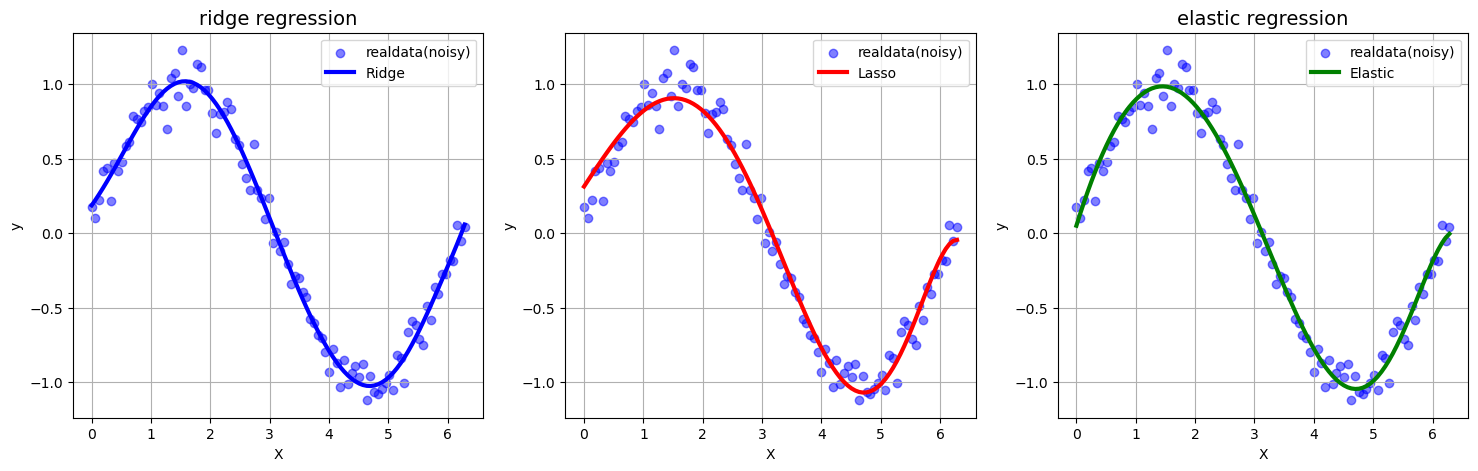

In [15]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(X,y,color="blue",label="realdata(noisy)",alpha=0.5)
plt.plot(X,y_ridge,color="blue",label="Ridge",linewidth=3)
plt.title("ridge regression",fontsize=14)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.subplot(1,3,2)
plt.scatter(X,y,color="blue",label="realdata(noisy)",alpha=0.5)
plt.plot(X,y_lasso,color="red",label="Lasso",linewidth=3)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.subplot(1,3,3)
plt.scatter(X,y,color="blue",label="realdata(noisy)",alpha=0.5)
plt.plot(X,y_elastic,color="green",label="Elastic",linewidth=3)
plt.title("elastic regression",fontsize=14)
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()
            

C:\Users\admin\AppData\Local\Temp\ipykernel_8540\3538290642.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\admin\AppData\Local\Temp\ipykernel_8540\3538290642.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


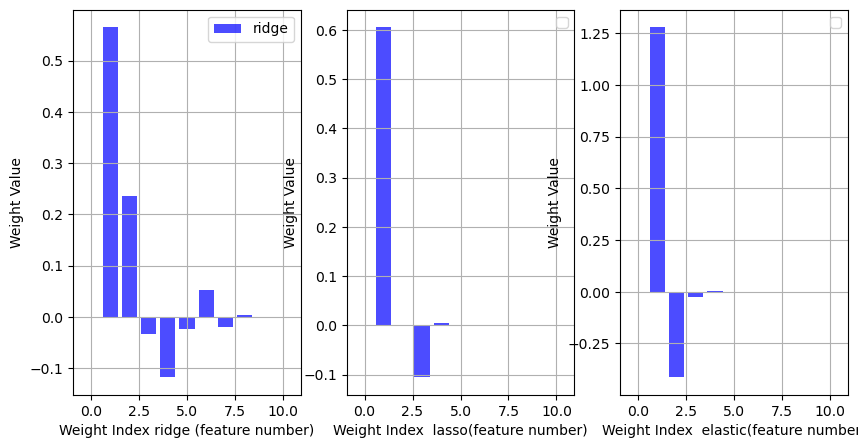

In [28]:
ridge_weights=ridge.coef_
lasso_weights=lasso.coef_
elastic_weights=elastic.coef_

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.bar(range(len(ridge_weights)),ridge_weights,color="blue",alpha=0.7,label="ridge")
plt.legend()
plt.xlabel("Weight Index ridge (feature number)")
plt.ylabel("Weight Value")
plt.grid(True)
plt.subplot(1,3,2)
plt.bar(range(len(lasso_weights)),lasso_weights,color="blue",alpha=0.7)
plt.xlabel("Weight Index  lasso(feature number)")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.subplot(1,3,3)
plt.bar(range(len(elastic_weights)),elastic_weights,color="blue",alpha=0.7)
plt.xlabel("Weight Index  elastic(feature number)")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.show()

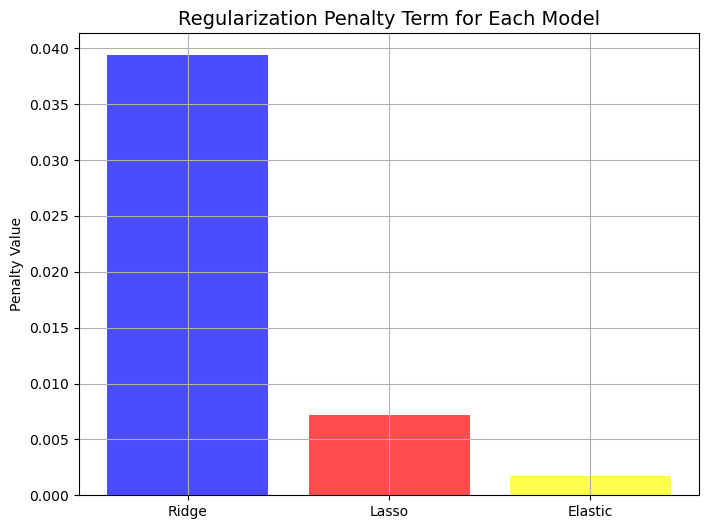

In [34]:
ridge_weights=ridge.coef_
lasso_weights=lasso.coef_
elastic_weights=elastic.coef_
ridge_reg_term=ridge.alpha * np.sum(ridge_weights **2)
lasso_reg_term=lasso.alpha *np.sum(np.abs(lasso_weights))
elastic_reg_term=elastic.alpha *(elastic.l1_ratio *np.sum(np.abs(elastic_weights)) +
                                 (1-elastic.l1_ratio) * np.sum(elastic_weights **2))

plt.figure(figsize=(8,6))
plt.bar(["Ridge","Lasso","Elastic"],
        [ridge_reg_term,lasso_reg_term,elastic_reg_term],color=["blue","red","yellow"]
        ,alpha=0.7)
plt.title("Regularization Penalty Term for Each Model", fontsize=14)
plt.ylabel("Penalty Value")
plt.grid(True)
plt.show()